This notebook contents ansvers to exercises of https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

1. What are 3 areas in industry where computer vision is currently being used?
Quality control
Computer vision can be used for quality control of products at factories. 
Medicine
Computer vision is extensively used in analyzing medical images, such as X-rays, MRIs, and CT scans.
Automotive 
Self-driving cars rely heavily on computer vision to perceive their surroundings.

2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
Overfitting in machine learning occurs when a model learns not only the underlying pattern in the training data but also the noise and details specific to that particular dataset, leading to poor generalization on new, unseen data.

3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
Cross-Validation: Training the model on multiple data subsets ensures better generalization to new data.
Regularization: Adding penalties for large coefficients discourages overly complex models.
Dropout: Randomly dropping units during training prevents reliance on specific paths, improving generalization.

5. Load the torchvision.datasets.MNIST() train and test datasets.

In [2]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

RuntimeError: operator torchvision::nms does not exist

In [65]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

Checking the data

In [66]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Image shape

In [67]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

Images are black&white with size 28*28
Then checking size of dataset

In [68]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So dataset includes 60000 train and 10000 test images
Then we find classes of images

In [69]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

So we have 10 classes of images with numbers 0-9

6. Visualize at least 5 different samples of the MNIST training dataset.

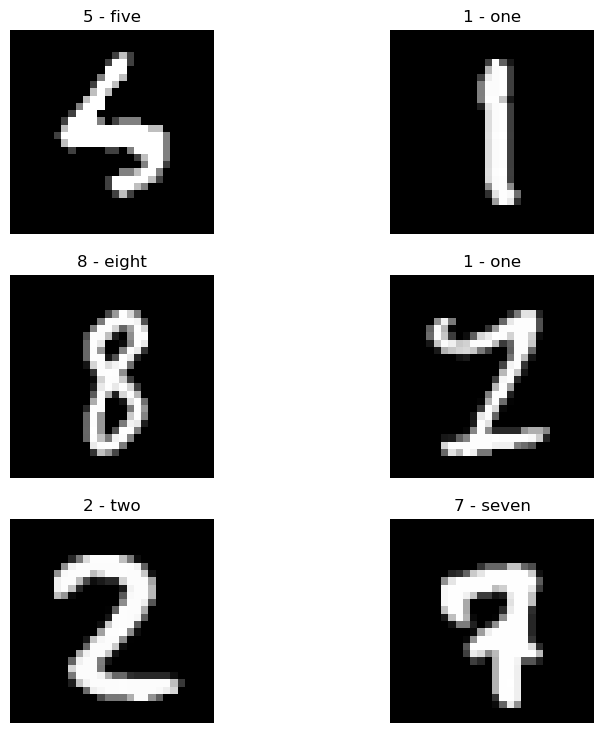

In [70]:
import matplotlib.pyplot as plt
torch.manual_seed(13)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 2
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

So we showed 6 random images of dataset with their classes

7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [71]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False 
)


print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fe82cbcc810>, <torch.utils.data.dataloader.DataLoader object at 0x7fe8618928d0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


So we splitted dataset to batches of 32 images.
Then let's check random image again

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


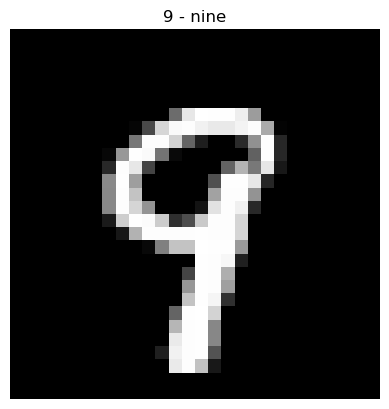

In [72]:
# Show a sample
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
torch.manual_seed(13)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

8. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

So now we create a CNN model for MNIST dataset
First we define cuda device

In [1]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

So we are using GPU 
Next step is creation of CNN

In [74]:
# Create a convolutional neural network 
class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(13)
model = MNISTModel(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Then we setup loss and optimizer

In [75]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                             lr=0.1)

8. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

So let's setup loss, optimizer and evaluatiom metrics and functions of training and testing

In [76]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to device
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Then function to measure time

In [77]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [89]:
torch.manual_seed(13)
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Measure time
from timeit import default_timer as timer
train_time_start_model = timer()

# Train and test model 
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                           end=train_time_end_model,
                                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.04782 | Train accuracy: 98.50%
Test loss: 0.04608 | Test accuracy: 98.38%

Epoch: 1
---------
Train loss: 0.04319 | Train accuracy: 98.64%
Test loss: 0.04739 | Test accuracy: 98.50%

Epoch: 2
---------
Train loss: 0.03952 | Train accuracy: 98.73%
Test loss: 0.04430 | Test accuracy: 98.56%

Epoch: 3
---------
Train loss: 0.03638 | Train accuracy: 98.90%
Test loss: 0.04408 | Test accuracy: 98.50%

Epoch: 4
---------
Train loss: 0.03375 | Train accuracy: 98.97%
Test loss: 0.04071 | Test accuracy: 98.66%

Epoch: 5
---------
Train loss: 0.03221 | Train accuracy: 98.97%
Test loss: 0.03547 | Test accuracy: 98.83%

Epoch: 6
---------
Train loss: 0.02902 | Train accuracy: 99.06%
Test loss: 0.03767 | Test accuracy: 98.85%

Epoch: 7
---------
Train loss: 0.02700 | Train accuracy: 99.11%
Test loss: 0.03784 | Test accuracy: 98.77%

Epoch: 8
---------
Train loss: 0.02492 | Train accuracy: 99.21%
Test loss: 0.03738 | Test accuracy: 98.85%

Epoch: 9
---------
Train los

Then let's try to use CPU

In [59]:
device = 'cpu'
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                           end=train_time_end_model,
                                           device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.05038 | Train accuracy: 98.44%
Test loss: 0.05873 | Test accuracy: 98.04%

Epoch: 1
---------
Train loss: 0.04512 | Train accuracy: 98.56%
Test loss: 0.04154 | Test accuracy: 98.58%

Epoch: 2
---------
Train loss: 0.04114 | Train accuracy: 98.69%
Test loss: 0.04335 | Test accuracy: 98.55%

Train time on cpu: 63.061 seconds


I used RTX 4060 and Ryzen 5 3600 so time was 22.9 vs 80.9 secounds
!!!! After running it on CPU you should relaunch GPU part to avoid errors in next steps!!!

In [60]:
device = "cuda" if torch.cuda.is_available() else "cpu"

10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

So we make function for predictions 

In [79]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

Take a random image

In [80]:
import random
random.seed(13)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (6 - six)


In [81]:
# Make predictions on test samples with model
pred_probs= make_predictions(model=model, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.0959e-03, 1.2061e-06, 1.8144e-07, 1.3940e-07, 5.8367e-07, 1.1733e-02,
         9.8714e-01, 3.6817e-10, 2.6303e-05, 1.2787e-07],
        [1.9945e-02, 2.9741e-07, 7.5992e-06, 1.0734e-05, 1.8588e-05, 8.9912e-01,
         8.0467e-02, 2.3993e-09, 2.9793e-04, 1.3328e-04]])

Checking and then converting to class

In [82]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 5, 4, 1, 1, 1, 4, 2, 4])

In [83]:
test_labels, pred_classes

([6, 5, 4, 1, 1, 1, 4, 2, 4], tensor([6, 5, 4, 1, 1, 1, 4, 2, 4]))

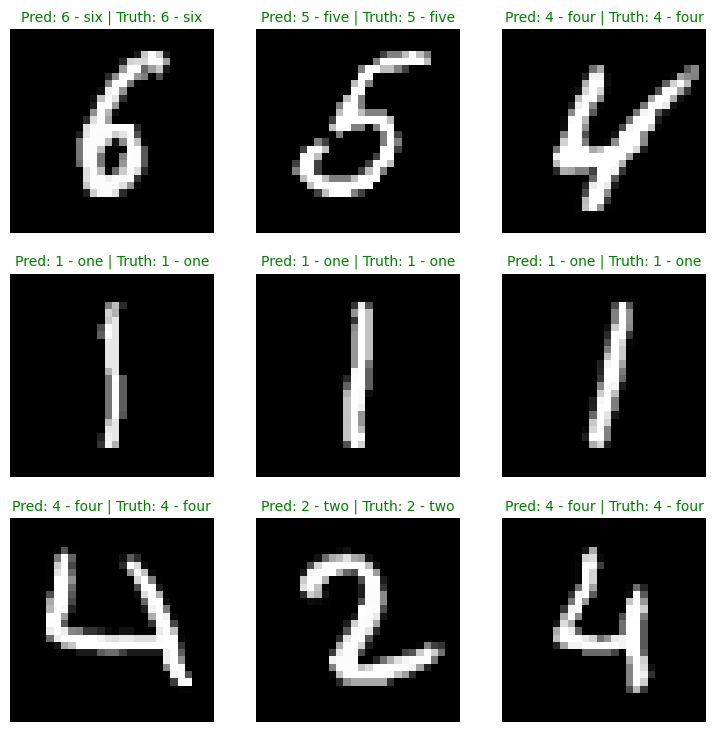

In [84]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

11. Plot a confusion matrix comparing your model's predictions to the truth labels.

First we make predictions

In [90]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [91]:
import torchmetrics, mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


Making confusion matrix

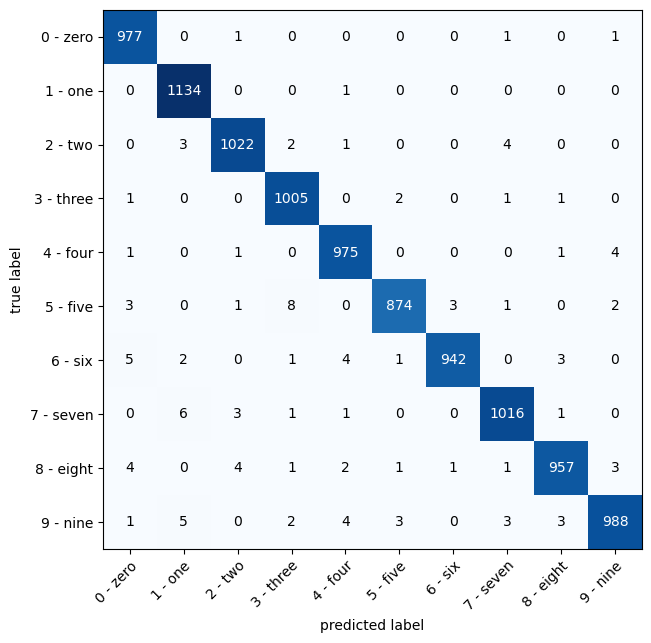

In [92]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);


12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

First we create a random tensor

In [93]:
torch.manual_seed(13)

# Create sample batch of random numbers with same size as image batch
image = torch.randn(size=(1, 3, 64, 64)) # [batch_size, color_channels, height, width]
print(f"Single image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{image}")

Single image shape: torch.Size([1, 3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[[ 4.3716e-01,  3.7006e-01,  1.5816e+00,  ...,  1.4596e+00,
            1.0305e+00,  8.7925e-01],
          [ 3.2857e-01, -7.4203e-02,  1.4140e-01,  ...,  1.3435e+00,
           -1.4151e+00, -2.7602e-01],
          [ 2.6306e-01,  6.2724e-01,  1.9222e+00,  ..., -9.3032e-01,
           -9.5611e-01,  1.9313e-01],
          ...,
          [-8.8858e-01,  1.6535e+00, -7.2044e-01,  ...,  3.3740e-01,
            9.2738e-01,  3.3661e-01],
          [ 5.8823e-01, -9.9541e-01,  4.5591e-01,  ..., -9.8666e-01,
           -4.4846e-01, -9.2301e-01],
          [ 1.5960e-01, -1.5032e+00, -9.1574e-01,  ..., -7.9554e-01,
           -6.0971e-01,  1.4942e+00]],

         [[ 4.9323e-01, -2.2652e-01, -1.6340e-01,  ...,  1.1911e+00,
           -1.3160e+00,  2.5456e-03],
          [-8.5170e-01,  5.3452e-01,  2.3352e-01,  ...,  3.7567e-01,
           -2.4935e-01, -1.9656e-01],
          [ 8.3787

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


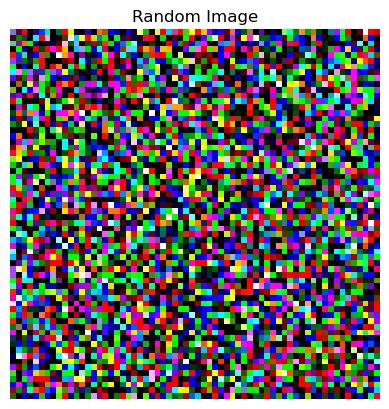

Image size: torch.Size([1, 3, 64, 64])


In [99]:
# Show a sample

img = img.permute(1, 2, 0)

# Display the image
plt.imshow(img)
plt.title('Random Image')
plt.axis("Off")
plt.show()

# Print the image size
print(f"Image size: {image.shape}")

Taking image to convolutional layer

In [104]:
torch.manual_seed(13)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=7,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
image2 = conv_layer(image)
image2.shape

torch.Size([1, 10, 58, 58])

Changing kernel size changes sizes of images in out channels